# 데이터 다운로드

In [1]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

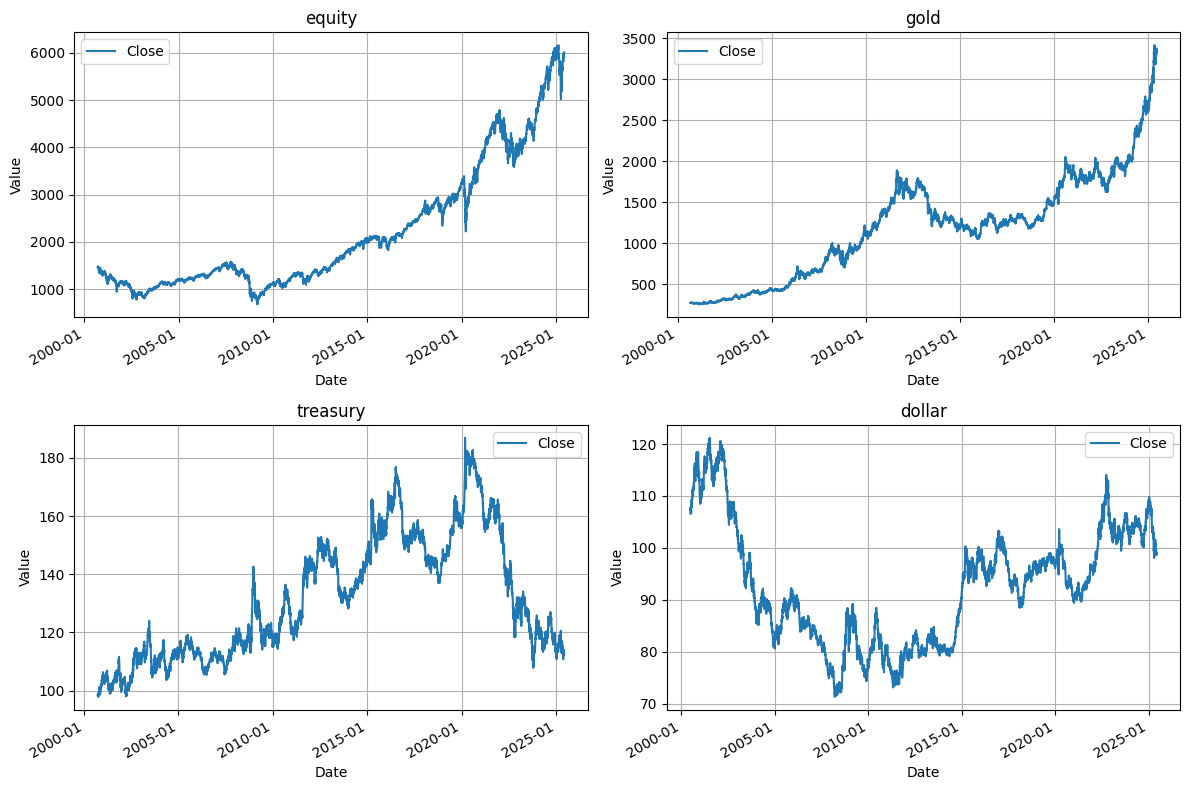

In [2]:
with open("../config/data_config.yaml", "r") as f:
    data_config = yaml.safe_load(f)['name_map']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (name, col) in enumerate(data_config.items()):
    df = pd.read_csv(f"../data/{name}.csv", parse_dates=["Date"])
    ax = axes[i // 2, i % 2]
    df.plot(x='Date', y="Close", ax=ax, title=name)
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 5년마다 하나 표시
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.grid(True)
plt.tight_layout()
plt.savefig("../results/figs/prices.png", dpi=300)